 For the classification task, use an artificial neural network (ANN) to classify following dataset and plot the training loss curve. For the regression task, apply an ANN to the following regression dataset and plot the loss curve over epochs. Evaluate the performance using accuracy for the classification task and MSE for the regression task.

Classification Task: Heart Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Helper function to plot the loss curve
def plot_loss_curve(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history.get('val_loss', []), label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
#Classification Dataset: https://www.kaggle.com/code/mragpavank/heart-disease-uci/input
heart_data = pd.read_csv("/content/drive/MyDrive/NN/Lab 3/heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X_classification = heart_data.drop("target", axis=1)
y_classification = heart_data["target"]

In [ ]:
len(X_classification)

303

In [ ]:
len(y_classification)

303

In [ ]:
# Split the dataset
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler_clf = StandardScaler()
X_train_clf = scaler_clf.fit_transform(X_train_clf)
X_test_clf = scaler_clf.transform(X_test_clf)


In [ ]:
model_clf = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_clf.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_clf = model_clf.fit(X_train_clf, y_train_clf, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6357 - loss: 0.6471 - val_accuracy: 0.7600 - val_loss: 0.5629
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6778 - loss: 0.6067 - val_accuracy: 0.7200 - val_loss: 0.5205
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7891 - loss: 0.5565 - val_accuracy: 0.7600 - val_loss: 0.4872
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7745 - loss: 0.5372 - val_accuracy: 0.8000 - val_loss: 0.4619
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8026 - loss: 0.4933 - val_accuracy: 0.8800 - val_loss: 0.4407
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8081 - loss: 0.4746 - val_accuracy: 0.8800 - val_loss: 0.4221
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8360 - loss: 0.4684 - val_accuracy: 0.9200 - val_loss: 0.4057
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8164 - loss: 0.4609 - val_accuracy: 0.8800 - val_loss: 0.3926


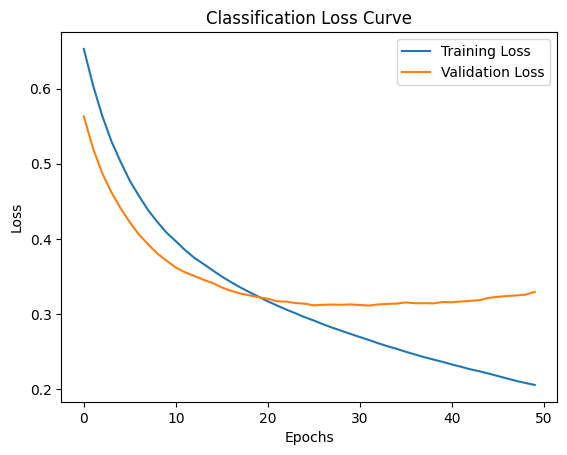

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8391 - loss: 0.4539
Classification Accuracy: 85.25%


In [ ]:
plot_loss_curve(history_clf, "Classification Loss Curve")

# Evaluate the model
loss_clf, accuracy_clf = model_clf.evaluate(X_test_clf, y_test_clf)
print(f"Classification Accuracy: {accuracy_clf * 100:.2f}%")


Regression Task: Salary Dataset

In [ ]:
#Regression Dataset: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
salary_data = pd.read_csv("/content/drive/MyDrive/NN/Lab 3/Salary_dataset.csv")
salary_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
# Separate features and target
X_regression = salary_data[["YearsExperience"]]
y_regression = salary_data["Salary"]

In [ ]:
len(X_regression)

30

In [ ]:
len(y_regression)

30

In [ ]:
# Split the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)


In [ ]:
# Build the improved ANN model for regression
model_reg = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_reg.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_reg.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model with improved regularization
history_reg = model_reg.fit(X_train_reg, y_train_reg, epochs=500, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - loss: 6047155200.0000 - mse: 6047155200.0000 - val_loss: 5392569856.0000 - val_mse: 5392569856.0000
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 6558398976.0000 - mse: 6558398976.0000 - val_loss: 5392566784.0000 - val_mse: 5392566784.0000
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 6658003968.0000 - mse: 6658003968.0000 - val_loss: 5392563200.0000 - val_mse: 5392563200.0000
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 6635830272.0000 - mse: 6635830272.0000 - val_loss: 5392560640.0000 - val_mse: 5392560640.0000
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 6207316992.0000 - mse: 6207316992.0000 - val_loss: 5392557568.0000 - val_mse: 5392557568.0000
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 6311753728.0000 - mse: 6311753728.0000 - val_loss: 5392553472.0000 - val_mse: 5392553472.0000
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 6386929664.0000 - mse: 63869

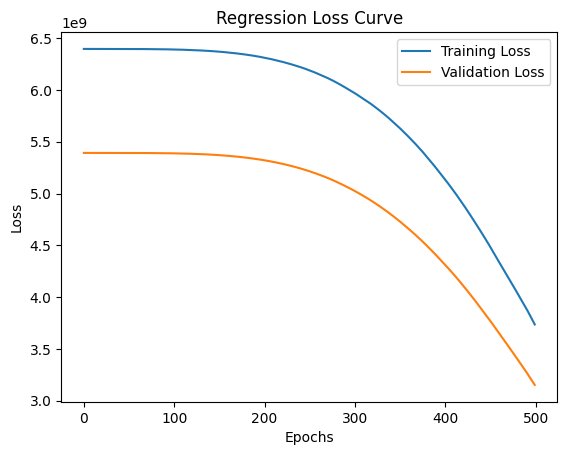

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4495838720.0000 - mse: 4495838720.0000
Regression Mean Squared Error (MSE): 4495838720.00


In [ ]:
# Plot the loss curve
plot_loss_curve(history_reg, "Regression Loss Curve")

# Evaluate the model
loss_reg, mse_reg = model_reg.evaluate(X_test_reg, y_test_reg)
print(f"Regression Mean Squared Error (MSE): {mse_reg:.2f}")